### PROBLEM SATEMENT
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description: Murder -- Muder rates in different places of United States Assualt- Assualt rate in different places of United States UrbanPop - urban population in different places of United States Rape - Rape rate in different places of United States

## IMPORTING LIBRARIES

In [2]:
# importing the libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.cluster import hierarchy as sch
from sklearn.metrics import silhouette_score as sil
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as agg
from sklearn.cluster import DBSCAN as dbs
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# IMPORTING CSV FILE

In [3]:
# importing the crime.csv datafile
df=pd.read_csv("crime_data.csv")

In [4]:
# to see first 5 rows
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EDA

In [5]:
# to see the number of rows and columns
df.shape

(50, 5)

In [6]:
# to get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
# to see is there anu null values
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
# to see stastical data
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## FEATURE ENGINEERING

In [9]:
# to insert in new varible without the unnamed column
df1=df.drop('Unnamed: 0',axis=1)

In [10]:
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## NORMALIZING DATA

In [11]:
# Normalizatio used to scale different columns scales to the one single scale

In [12]:
from sklearn.preprocessing import normalize
# normalize fuction changes the data into one single scale but in list form so we changing it into the dataframe again
df_norm=pd.DataFrame(normalize(df1),columns=df1.columns)
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [13]:
df_norm.shape

(50, 4)

# Visualization

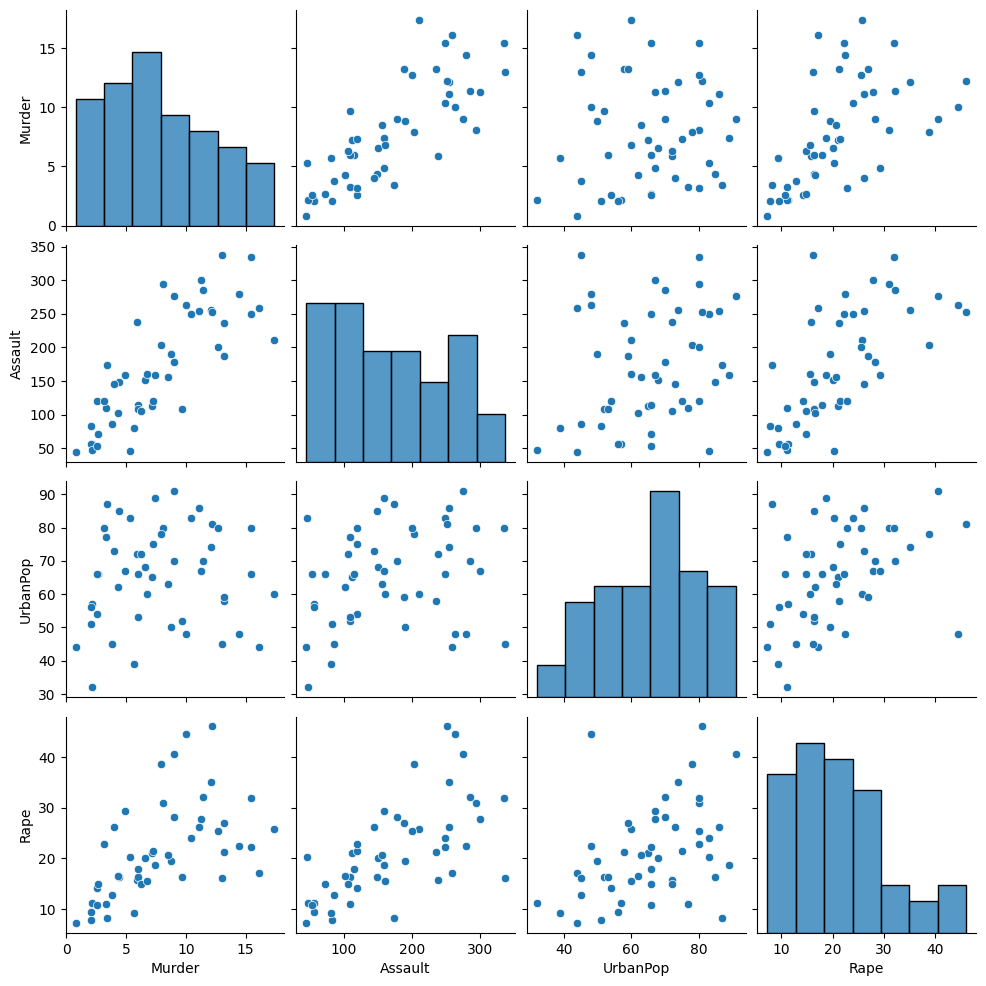

In [14]:
# to see the relation of the columns in df (normal) data
sns.pairplot(df)
plt.show()

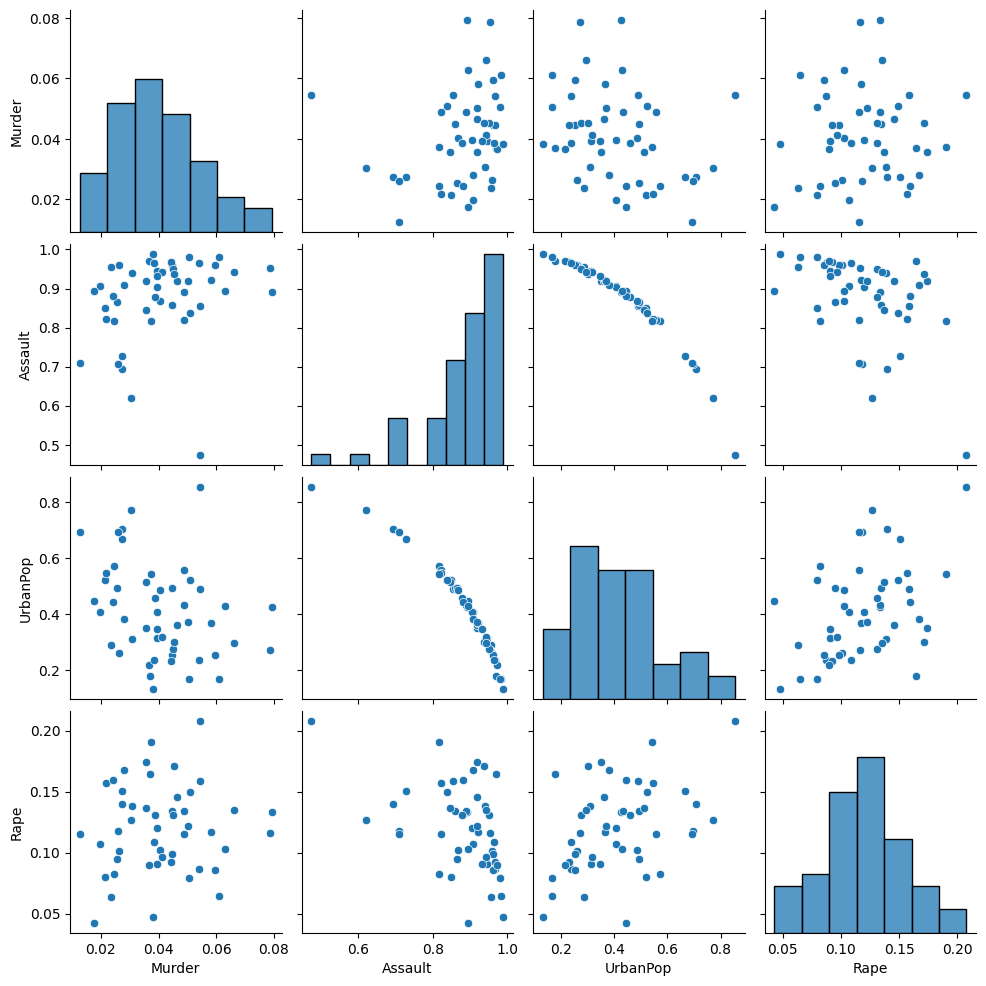

In [15]:
# to see the relations between the columns of df_norm data
sns.pairplot(df_norm)
plt.show()

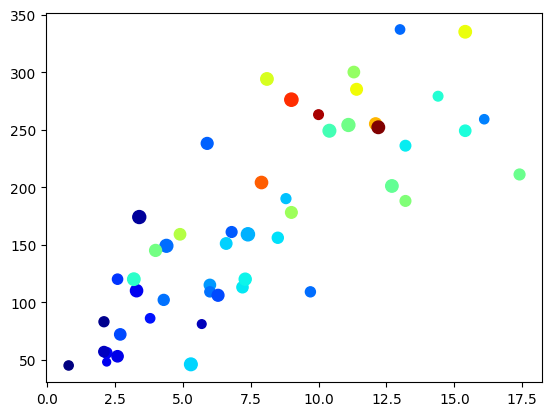

In [16]:
# to see the relation between the 4 columns of df
plt.scatter(df['Murder'],df['Assault'],df['UrbanPop'],df['Rape'],cmap='jet')
plt.show()

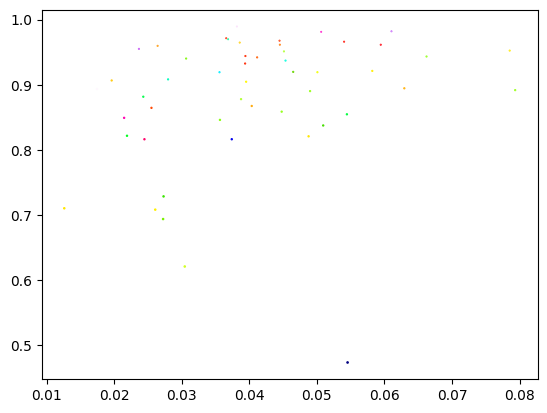

In [17]:
# to see the relation between the 4 columns of df_norm
plt.scatter(df_norm['Murder'],df_norm['Assault'],df_norm['UrbanPop'],df_norm['Rape'],cmap='gist_ncar_r')
plt.show()

# Now different clustering methods to do clustering

# 1. Hierarchical Clustering¶

*Create dendrogram of normalization data for all* *methods*

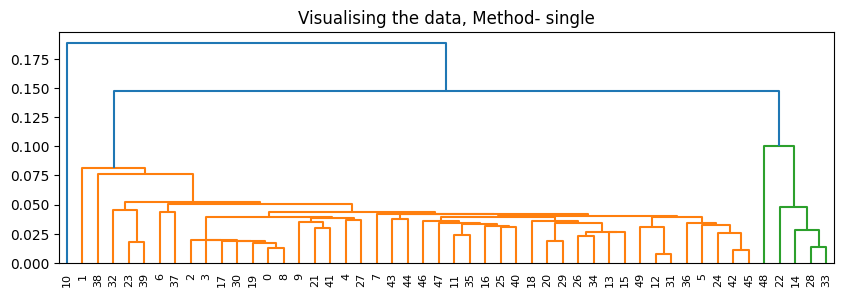

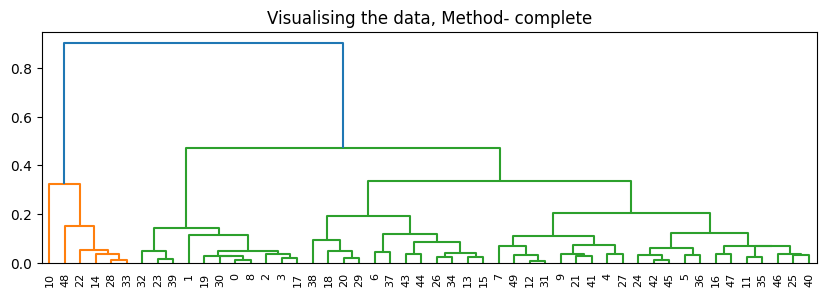

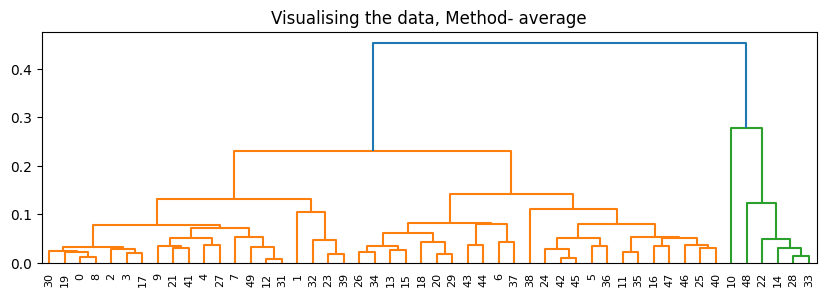

In [18]:
# there are 3 methods for the dendogram so we would use loop to apply each method
for methods in ['single','complete','average']:
     plt.figure(figsize =(10, 3))
     plt.title('Visualising the data, Method- {}'.format(methods))
     Dendrogram = sch.dendrogram(sch.linkage(df_norm, method = methods,optimal_ordering=False))

plt.show()

# Inference
As we can see that in average and single linkage method clusters are not properly formed but in complete method they look finely differentiable and by that we can see that we can easily make 3 or 5 clusters.

In [19]:
# for more conformation here we are gonna use Silhouette Coefficient score
nc=[2,3,4,5,6,7,8,9]
for af in ['euclidean','l1','l2','manhattan','cosine']: # different types of affinity
    for i in nc: # different number of clusters
        for linkages in ['single','average','complete']: # different types of linkages
            hc = AgglomerativeClustering(n_clusters=i,affinity = af ,linkage = linkages)
            y = hc.fit_predict(df_norm)
            sc=sil(df_norm,y)
            print('affinity = {},Clusters = {}, linkage = {}, Sc score = {}'.format(af,i,linkages,sc)) # Sc score= Silhouette Coefficient score
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

affinity = euclidean,Clusters = 2, linkage = single, Sc score = 0.5941710401826306
affinity = euclidean,Clusters = 2, linkage = average, Sc score = 0.6037116221173207
affinity = euclidean,Clusters = 2, linkage = complete, Sc score = 0.6037116221173207
affinity = euclidean,Clusters = 3, linkage = single, Sc score = 0.5431936191625951
affinity = euclidean,Clusters = 3, linkage = average, Sc score = 0.5431936191625951
affinity = euclidean,Clusters = 3, linkage = complete, Sc score = 0.40861432250058
affinity = euclidean,Clusters = 4, linkage = single, Sc score = 0.4966896266306986
affinity = euclidean,Clusters = 4, linkage = average, Sc score = 0.5191395036557488
affinity = euclidean,Clusters = 4, linkage = complete, Sc score = 0.4120453539053902
affinity = euclidean,Clusters = 5, linkage = single, Sc score = 0.09816536549640345
affinity = euclidean,Clusters = 5, linkage = average, Sc score = 0.4635175688797497
affinity = euclidean,Clusters = 5, linkage = complete, Sc score = 0.4115211805

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

affinity = manhattan,Clusters = 3, linkage = complete, Sc score = 0.5359200720251941
affinity = manhattan,Clusters = 4, linkage = single, Sc score = 0.4966896266306986
affinity = manhattan,Clusters = 4, linkage = average, Sc score = 0.5191395036557488
affinity = manhattan,Clusters = 4, linkage = complete, Sc score = 0.5191395036557488
affinity = manhattan,Clusters = 5, linkage = single, Sc score = 0.02850753384058569
affinity = manhattan,Clusters = 5, linkage = average, Sc score = 0.4635175688797497
affinity = manhattan,Clusters = 5, linkage = complete, Sc score = 0.4635175688797497
affinity = manhattan,Clusters = 6, linkage = single, Sc score = -0.15574612153348885
affinity = manhattan,Clusters = 6, linkage = average, Sc score = 0.4316031967415574
affinity = manhattan,Clusters = 6, linkage = complete, Sc score = 0.4316031967415574
affinity = manhattan,Clusters = 7, linkage = single, Sc score = -0.059800886472520666
affinity = manhattan,Clusters = 7, linkage = average, Sc score = 0.420

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

# Inference
As we can see for all the affinity values and cluster of 2 we are getting the heighest Silhouette Coefficient score which is 0.6037116221173207 for average and complete linkage both. but for proper clustering we are comparing between 3 or 5 (as per dendogram) and by comparison we can say 3 is better than 5 with higher Silhouette Coefficient score of 0.5431936191625951 for average and complete linkage both.

As SC Score is same so we gonna use affinity = euclidean(can use any of them),no. of clusters = 3 and linkage = complete ( also can use average as per SC Score).

In [20]:
# defining the model and prediction
first_model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y=first_model.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [21]:
df['cluster id']=y

In [22]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster id
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [23]:
# to see which data belongs to which cluster
df.groupby(["cluster id"])["Unnamed: 0"].apply(lambda x:tuple(x))

cluster id
0    (California, Colorado, Connecticut, Delaware, ...
1    (Hawaii, Iowa, Minnesota, New Hampshire, North...
2    (Alabama, Alaska, Arizona, Arkansas, Florida, ...
Name: Unnamed: 0, dtype: object

In [24]:
# predicted values- values divided by labels of cluster
first_model.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

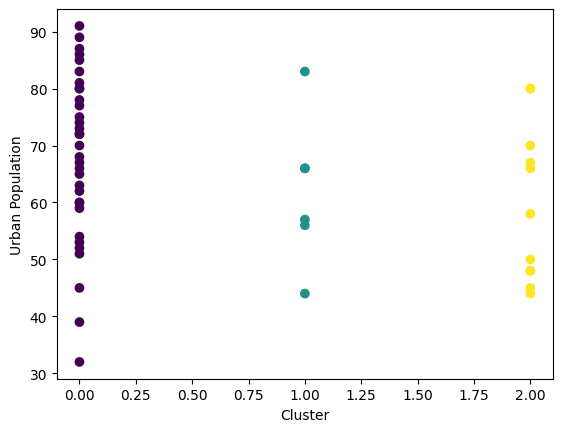

In [26]:
plt.scatter(df['cluster id'],df['UrbanPop'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Urban Population')
plt.show()

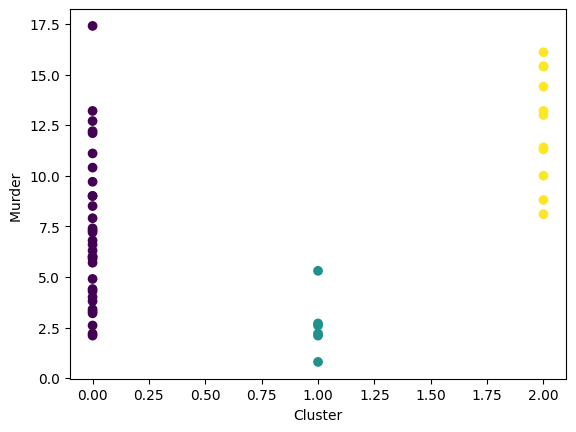

In [27]:
plt.scatter(df['cluster id'],df['Murder'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Murder ')
plt.show()

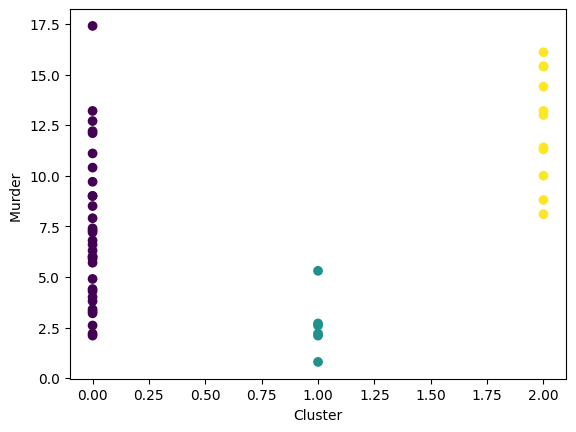

In [28]:
plt.scatter(df['cluster id'],df['Murder'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Murder ')
plt.show()

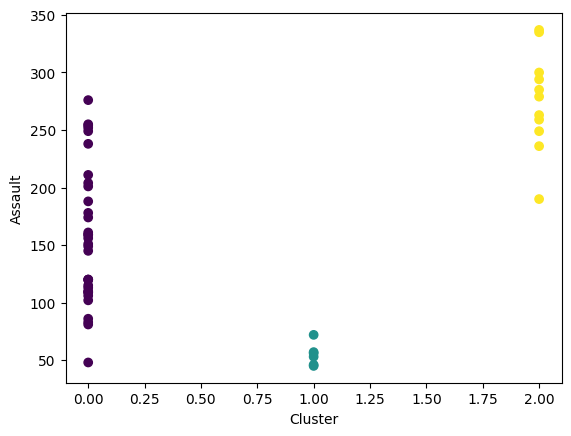

In [29]:
plt.scatter(df['cluster id'],df['Assault'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Assault')
plt.show()

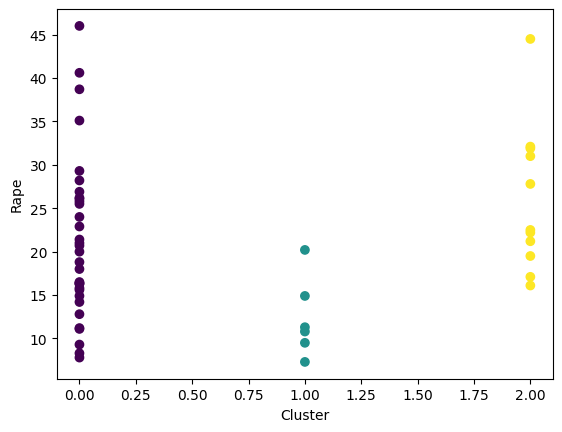

In [30]:
plt.scatter(df['cluster id'],df['Rape'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Rape')
plt.show()

## 2. K-Means

In [35]:
    #Finding optimal number of cluster for normalize data
    #using Elbow method and silhoutte method

    nc=[2,3,4,5,6,7,8,9]
    iner=[]
    silscore =[]

    for i in nc:
        Km=KMeans(i)
        Km.fit(df_norm)
        iner.append(Km.inertia_)


    for i in nc:
        hc = KMeans(n_clusters=i)
        y=hc.fit_predict(df_norm)
        silscore.append(sil(df_norm,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [36]:
# inertia values
iner

[0.7540963759591797,
 0.3278478050693132,
 0.22760245765174872,
 0.16395152491640727,
 0.12131705133727906,
 0.09983590959602928,
 0.08750294302084377,
 0.07766132563216041]

In [37]:
# silhoutte scores
silscore

[0.5240686325107645,
 0.5429805198778497,
 0.46582251781897477,
 0.4693605748149825,
 0.4206035628530419,
 0.3853769628791244,
 0.3744225526175329,
 0.3417100500514367]

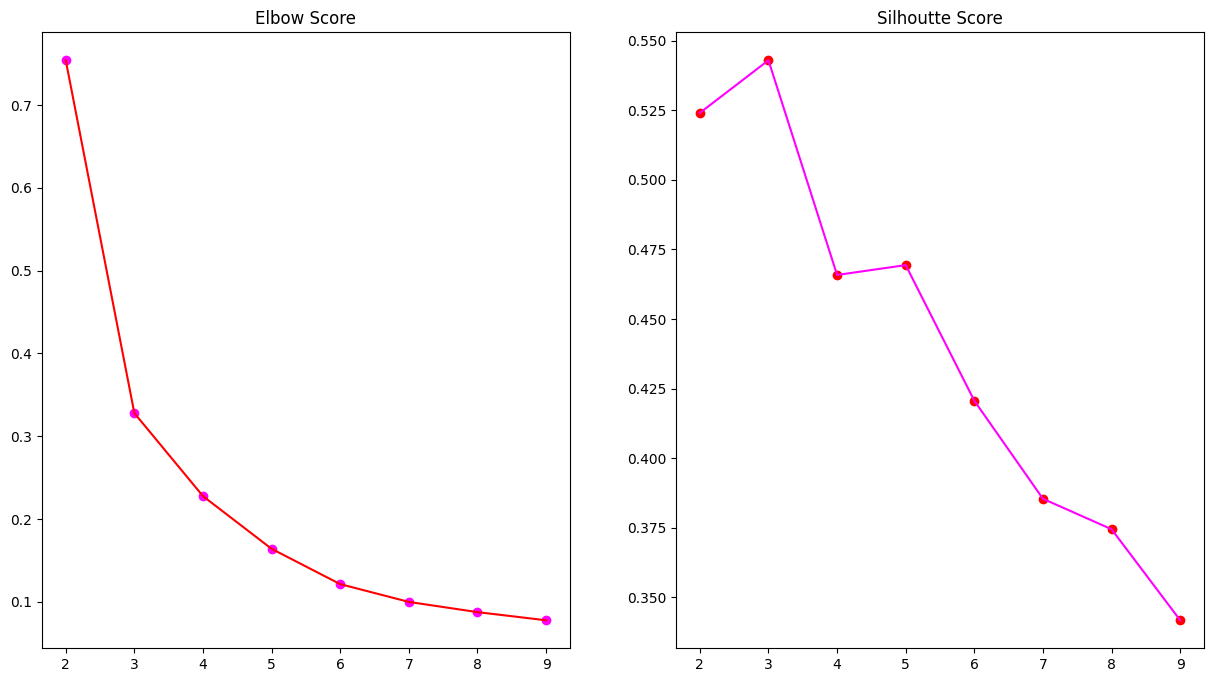

In [38]:
# plotting Elbow Score and Silhoutte Score graphs
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color='red')
plt.scatter(nc,iner,color='magenta')
plt.title('Elbow Score')

plt.subplot(1,2,2)
plt.plot(nc,silscore,color='magenta')
plt.scatter(nc,silscore,color='red')
plt.title('Silhoutte Score')
plt.show()

# Inference
Optimal number of clustering
1. as per elbow graph the significant change is after 3 and
2. as per Silhoutte Score at 3 its heighest so is 3.

so by K-Means Optimal number of clustering is 3.

# 3. DBscan¶

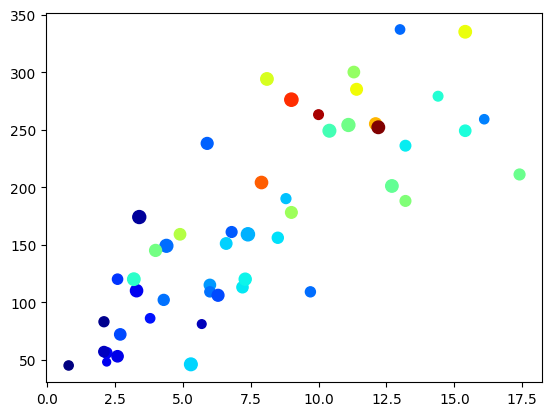

In [39]:
#plt.figure(figsize=5)
plt.scatter(df['Murder'],df['Assault'],df['UrbanPop'],df['Rape'],cmap='jet')
plt.show()

In [40]:
# importing DBscan
from sklearn.cluster import DBSCAN

In [41]:
# defining the model
dbs=DBSCAN(eps=0.5, min_samples=3)

In [42]:
# fitting the model
labels=dbs.fit_predict(df1)

In [43]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

## inference
after using different combinations of eps and min_samples ,the labels only predicting -1 which also known as outliers. so here dbscan failed to construct clusters for normal data because its considering every point as outliers.

In [44]:
# again defining the model
dbs1=DBSCAN(eps=1, min_samples=2)

In [45]:
# lets use normalised data if it works or not
labels_norm=dbs1.fit_predict(df_norm)
labels_norm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

# Inference
By using the normalized data dbscan made 1 cluster only that means its also marking whole data as same. so we can say here that DBSCAN only made 1 cluster.

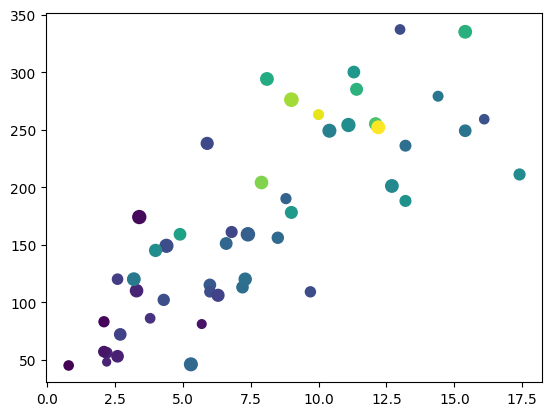

In [46]:
plt.scatter(df['Murder'],df['Assault'],df['UrbanPop'],df['Rape'])
plt.show()